# Import variables

参考

https://disassemble-channel.com/lstm-multivariate-time-series/

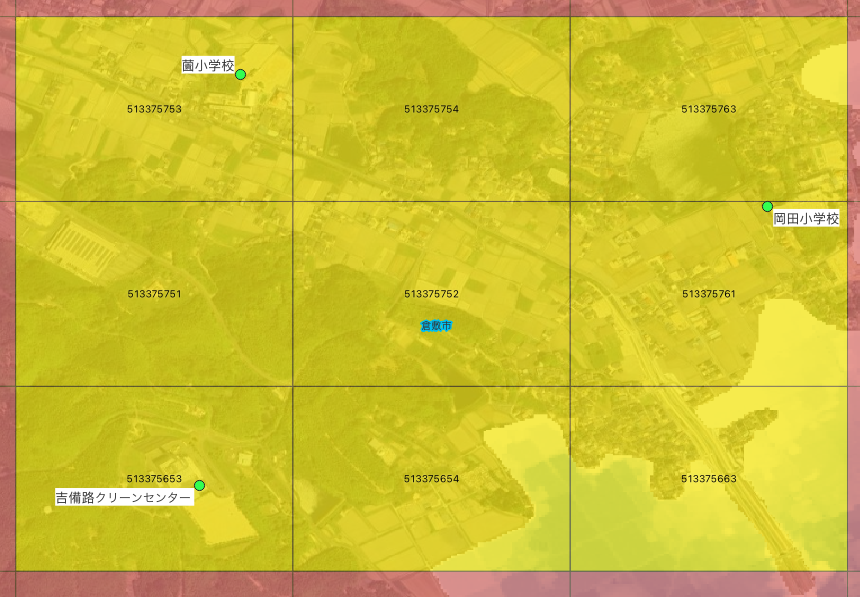

In [1]:
import numpy as np
import pandas as pd
import psycopg2
from datetime import datetime
from sqlalchemy import create_engine

# データベースの接続情報
connection_config = {
    'user': 'shin',
    'password': 'shin_password',
    'port': '5432',
    'database': 'mobaku_base',
    'host': '10.33.230.198'
}
connection = psycopg2.connect(**connection_config)

# c×d（縦×横）のメッシュサイズを設定
c, d = 3, 3  # 縦3×横3

# メッシュIDのリストを取得（例: Kurashiki地区のデータ）
mesh_list = ['513375753', '513375754', '513375763',
             '513375751', '513375752', '513375761',
             '513375653', '513375654', '513375663']
# ここでは1列のリストになっているが，左上から始まり，右上まで進み，一段下の左上から...最後は右下までの順で並んでいる．
# この並び順であれば，リスト番号を最後に列の個数で割ることで，商：行数,余り:列数という二次元変換が可能だ．

# 時間範囲を指定
train_start_date = '2016-01-01 00:00:00'
test_end_date = '2016-01-11 23:59:59'

# SQLクエリでデータを取得
sql_query = f"""
SELECT datetime, mesh_id, population
FROM population_00000
WHERE mesh_id IN ({','.join(mesh_list)})
AND datetime BETWEEN '{train_start_date}' AND '{test_end_date}'
ORDER BY datetime, mesh_id;
"""

# SQLAlchemyエンジンの作成
engine = create_engine(f"postgresql+psycopg2://{connection_config['user']}:{connection_config['password']}@{connection_config['host']}:{connection_config['port']}/{connection_config['database']}")

# `engine`を`pd.read_sql`に渡す
df_pop = pd.read_sql(sql=sql_query, con=engine)


# datetime列を変換し、インデックスを設定
df_pop['datetime'] = pd.to_datetime(df_pop['datetime'])
df_pop.set_index(['datetime', 'mesh_id'], inplace=True)

# タイムスタンプのリスト
timestamps = pd.date_range(start=train_start_date, end=test_end_date, freq='h')

# 4次元配列の初期化
a = len(timestamps)
b = 1  # 人口データ（1種類のデータを格納）
population_data = np.zeros((a, b, c, d))

# メッシュIDのインデックスを計算
mesh_id_index = {mesh_id: idx for idx, mesh_id in enumerate(mesh_list)}
print('for入る')
# データを埋める
for t_idx, timestamp in enumerate(timestamps):
    tmestamp_str=timestamp.strftime("%Y-%m-%d %H:%M:%S") ##タイムスタンプをstr形式で作成 例：　"2016-01-01 00:00:00"
    for mesh_id, mesh_data in df_pop.loc[timestamp].iterrows():
        # print(mesh_id)
        if str(mesh_id) in mesh_id_index:
            c_idx, d_idx = divmod(mesh_id_index[str(mesh_id)], d) #divmod(a,b)はaをbで割り，商と余りを(c,d)として返す関数．
            print(t_idx,0,c_idx,d_idx)
            population_data[t_idx, 0, c_idx, d_idx] = df_pop['population'][tmestamp_str][mesh_id]
                    #人口を数値として取得するためには df_pop['population']['2016-01-01 00:00:00'][513375653]



for入る
0 0 2 0
0 0 2 1
0 0 2 2
0 0 1 0
0 0 1 1
0 0 0 0
0 0 0 1
0 0 1 2
0 0 0 2
1 0 2 0
1 0 2 1
1 0 2 2
1 0 1 0
1 0 1 1
1 0 0 0
1 0 0 1
1 0 1 2
1 0 0 2
2 0 2 0
2 0 2 1
2 0 2 2
2 0 1 0
2 0 1 1
2 0 0 0
2 0 0 1
2 0 1 2
2 0 0 2
3 0 2 0
3 0 2 1
3 0 2 2
3 0 1 0
3 0 1 1
3 0 0 0
3 0 0 1
3 0 1 2
3 0 0 2
4 0 2 0
4 0 2 1
4 0 2 2
4 0 1 0
4 0 1 1
4 0 0 0
4 0 0 1
4 0 1 2
4 0 0 2
5 0 2 0
5 0 2 1
5 0 2 2
5 0 1 0
5 0 1 1
5 0 0 0
5 0 0 1
5 0 1 2
5 0 0 2
6 0 2 0
6 0 2 1
6 0 2 2
6 0 1 0
6 0 1 1
6 0 0 0
6 0 0 1
6 0 1 2
6 0 0 2
7 0 2 0
7 0 2 1
7 0 2 2
7 0 1 0
7 0 1 1
7 0 0 0
7 0 0 1
7 0 1 2
7 0 0 2
8 0 2 0
8 0 2 1
8 0 2 2
8 0 1 0
8 0 1 1
8 0 0 0
8 0 0 1
8 0 1 2
8 0 0 2
9 0 2 0
9 0 2 1
9 0 2 2
9 0 1 0
9 0 1 1
9 0 0 0
9 0 0 1
9 0 1 2
9 0 0 2
10 0 2 0
10 0 2 1
10 0 2 2
10 0 1 0
10 0 1 1
10 0 0 0
10 0 0 1
10 0 1 2
10 0 0 2
11 0 2 0
11 0 2 1
11 0 2 2
11 0 1 0
11 0 1 1
11 0 0 0
11 0 0 1
11 0 1 2
11 0 0 2
12 0 2 0
12 0 2 1
12 0 2 2
12 0 1 0
12 0 1 1
12 0 0 0
12 0 0 1
12 0 1 2
12 0 0 2
13 0 2 0
13 0 2 1
13 0 2 2
13 0

In [2]:
mesh_id_index

{'513375753': 0,
 '513375754': 1,
 '513375763': 2,
 '513375751': 3,
 '513375752': 4,
 '513375761': 5,
 '513375653': 6,
 '513375654': 7,
 '513375663': 8}

In [3]:
# 結果を確認
print("4次元配列の形状:", population_data.shape)
print("タイムステップ数:", a)
print('mesh_id_index:',mesh_id_index)
# print("人口データ:", population_data)

4次元配列の形状: (264, 1, 3, 3)
タイムステップ数: 264
mesh_id_index: {'513375753': 0, '513375754': 1, '513375763': 2, '513375751': 3, '513375752': 4, '513375761': 5, '513375653': 6, '513375654': 7, '513375663': 8}


In [4]:
print(population_data)

[[[[ 54. 136.  72.]
   [ 35. 172. 116.]
   [102. 155. 224.]]]


 [[[ 50. 210.  96.]
   [ 58. 102.  85.]
   [ 64. 268. 253.]]]


 [[[ 90. 213. 141.]
   [ 70. 152. 154.]
   [ 61. 248. 301.]]]


 ...


 [[[146. 156. 138.]
   [ 49.  97. 118.]
   [ 47. 200. 270.]]]


 [[[ 64. 186. 115.]
   [ 69. 141.  90.]
   [ 39. 215. 285.]]]


 [[[100. 160. 130.]
   [ 60. 135.  75.]
   [155. 158. 259.]]]]


# test

In [5]:
df = pd.DataFrame({'mesh_id': [1, 2, 3], 'population': [100, 200, 300]})
print(df)
print() 
print('---')

for idx, row in df.iterrows():
    print(row)
    print()

   mesh_id  population
0        1         100
1        2         200
2        3         300

---
mesh_id         1
population    100
Name: 0, dtype: int64

mesh_id         2
population    200
Name: 1, dtype: int64

mesh_id         3
population    300
Name: 2, dtype: int64

